<h1>Spanish Elections 2015/2016</h1>

Data of the elections of Spain in 2015 and 2106<br>
the data is from http://elecciones.elperiodico.com/resultados/generales/2016/espana/

In [1]:
import pandas


In [2]:
raw_elections_2015 = pandas.read_csv("test2015.csv",delimiter='\t')
raw_elections_2016 = pandas.read_csv("test2016.csv",delimiter='\t')

In [3]:
def find_PODEMOS(words):
    if 'PODEMOS' in words:
        return 'PODEMOS'
    if 'EN COMU' == words:
        return 'PODEMOS'
    return words

elections_2015 = raw_elections_2015
elections_2016 = raw_elections_2016

elections_2015['Partido'] = elections_2015['Partido'].apply(find_PODEMOS)
elections_2016['Partido'] = elections_2016['Partido'].apply(find_PODEMOS)

print(elections_2015.columns)

Index(['Partido', 'Votos', '%', 'Escannos'], dtype='object')


In [4]:
#The data is in spanish format (10,0 and 1.000) 
def replace_dots(word):
    return word.replace('.','')
def replace_commas(word):
    return word.replace(',','.')

elections_2015['Votos'] = elections_2015['Votos'].apply(replace_dots) 
elections_2015['%'] = elections_2015['%'].apply(replace_commas) 
elections_2016['Votos'] = elections_2016['Votos'].apply(replace_dots) 
elections_2016['%'] = elections_2016['%'].apply(replace_commas) 

In [5]:
elections_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
Partido     40 non-null object
Votos       40 non-null object
%           40 non-null object
Escannos    40 non-null int64
dtypes: int64(1), object(3)
memory usage: 1.3+ KB


<p>All the data are string</p>

In [6]:

elections_2015['Votos'] = pandas.to_numeric(elections_2015['Votos'], errors='coerse')
elections_2015['Escannos'] = pandas.to_numeric(elections_2015['Escannos'], errors='coerse')
elections_2015['%'] = pandas.to_numeric(elections_2015['%'], errors='coerse')
elections_2016['Votos'] = pandas.to_numeric(elections_2016['Votos'], errors='coerse')
elections_2016['Escannos'] = pandas.to_numeric(elections_2016['Escannos'], errors='coerse')
elections_2016['%'] = pandas.to_numeric(elections_2016['%'], errors='coerse')
print(elections_2015.head())
print(elections_2016.head())

   Partido    Votos      %  Escannos
0       PP  7236965  28.71       123
1     PSOE  5545315  22.00        90
2      C's  3514528  13.94        40
3  PODEMOS  3198584  12.69        42
4  PODEMOS   929880   3.69        12
   Partido    Votos      %  Escannos
0       PP  7902147  33.03       137
1     PSOE  5423171  22.67        85
2  PODEMOS  3199947  13.37        45
3      C's  3122192  13.05        32
4      ECP   848429   3.55        12


In [7]:
elections_2015.describe()

,Votos,%,Escannos
count,4.000000e+01,40.000000,40.000000
mean,6.252246e+05,2.480000,8.750000
std,1.547025e+06,6.137437,24.797384
min,1.604000e+03,0.010000,0.000000
25%,4.119500e+03,0.017500,0.000000
50%,3.252800e+04,0.125000,0.000000
75%,3.294115e+05,1.307500,3.000000
max,7.236965e+06,28.710000,123.000000


In [8]:
elections_2016 = elections_2016.groupby('Partido',as_index=False).sum()
elections_2015 = elections_2015.groupby('Partido',as_index=False).sum()

In [9]:
elections_2015.columns=['Partido','Votos 2015','% 2015', 'Escanos 2015']
elections_2016.columns=['Partido','Votos 2016','% 2016', 'Escanos 2016']

In [10]:
belections = pandas.merge(elections_2015, elections_2016, on='Partido',how='outer')
elections = pandas.merge(elections_2015, elections_2016, on='Partido',how='inner')

In [11]:
elections.sort_values('Votos 2015', ascending = False)

,Partido,Votos 2015,% 2015,Escanos 2015,Votos 2016,% 2016,Escanos 2016
16,PP,7236965,28.71,123,7902147,33.03,137
17,PSOE,5545315,22.00,90,5423171,22.67,85
15,PODEMOS,5212711,20.68,69,4199683,17.55,59
0,C's,3514528,13.94,40,3122192,13.05,32
7,ERC-CATSI,601782,2.39,9,629213,2.63,9
4,EAJ-PNV,302316,1.20,6,286215,1.20,5
11,PACMA,220369,0.87,0,284763,1.19,0
6,EH Bildu,219125,0.87,2,184092,0.77,2
2,CCa-PNC,81917,0.32,1,77873,0.33,1
21,VOX,58114,0.23,0,46742,0.20,0


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
sns.set_style({"grid.color": "1."})
sns.set_context("notebook", font_scale=1.5)

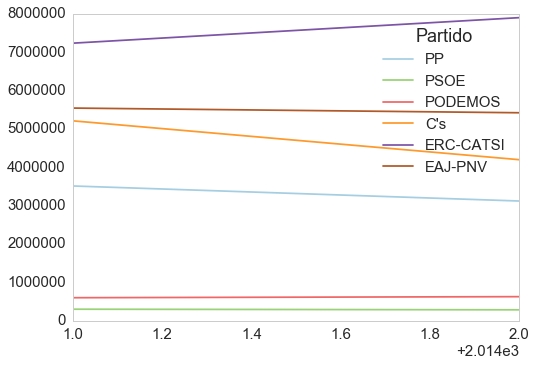

In [15]:
election_filtred = elections[elections['% 2015'] > 1.01]


election_filtred = election_filtred.sort_values('% 2016', ascending=False)
columns = election_filtred['Partido']

#Dataframe transposition for graph
dict_pre = {}
for i in range(election_filtred.shape[0]):
    #print(i)
    dict_pre[election_filtred.iloc[i,0]] = [election_filtred.iloc[i,1],election_filtred.iloc[i,4]]

election_graph = pandas.DataFrame(dict_pre, index=[2015,2016])
election_graph.columns = columns
election_graph.plot(colormap='Paired')



<h3>Despite all the corruption cases from the PP, only this growh their votes in 2016</h3>

In [ ]:
#elections.to_csv("elections_clean.csv")